In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
df_rsumm = pd.read_csv("reviews.csv")
print("reviews_summary : " + str(df_rsumm.shape))
df_rsumm

reviews_summary : (126679, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...
...,...,...,...,...,...,...
126674,52615785,474617200655639495,2021-10-16,423766055,Abdulkarim,Great location <br/>Steven was a great host co...
126675,52615817,468829552129880137,2021-10-08,5405281,Sravya,This place is very clean and comfortable. The ...
126676,52615817,475995853922424583,2021-10-18,38715483,Christopher,Steven was very responsive and communicative. ...
126677,52653198,471736779685385538,2021-10-12,195662357,Andy,"Had a great stay! Very clean home in a quite, ..."


In [4]:
import datetime
def mapper(month):
    date = datetime.datetime(2000, month, 1)  # You need a dateobject with the proper month
    return date.strftime('%b') 

In [5]:
df_rsumm['date'] = pd.to_datetime(df_rsumm['date'])
df_rsumm['year'] = df_rsumm['date'].dt.year
df_rsumm['month'] = df_rsumm['date'].dt.month
df_rsumm['day'] = df_rsumm['date'].dt.day

df_rsumm['year'] = df_rsumm['year'].astype(int)
df_rsumm['month'] = df_rsumm['month'].astype(int)
df_rsumm['day'] = df_rsumm['day'].astype(int)
df_rsumm.sort_values(['year', 'month'], ascending=[True, True],axis=0,inplace=True)

In [6]:
df_rsumm['month'] = df_rsumm['month'].apply(mapper)

In [7]:
df_rsumm_orig = df_rsumm.copy(deep=False) 

In [8]:
dropped = ['reviewer_name','comments']
df_rsumm.drop(dropped,axis=1,inplace=True)

In [9]:
df_rsumm['year'].value_counts()

2019    30494
2018    25445
2021    22183
2017    16532
2020    12787
2016     9599
2015     5244
2014     2414
2013     1071
2012      524
2011      296
2010       77
2009       13
Name: year, dtype: int64

In [10]:
df_2019 = df_rsumm[df_rsumm['year'] == 2019]
df_2018 = df_rsumm[df_rsumm['year'] == 2018]
df_2017 = df_rsumm[df_rsumm['year'] == 2017]
df_2020 = df_rsumm[df_rsumm['year'] == 2020]

In [11]:
dropped = ['year','day','id','date','listing_id']
df_2019.drop(dropped,axis=1,inplace=True)
df_2018.drop(dropped,axis=1,inplace=True)
df_2017.drop(dropped,axis=1,inplace=True)
df_2020.drop(dropped,axis=1,inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
df_2020["count"] = df_2020.groupby("month")["reviewer_id"].transform('count')
df_2019["count"] = df_2019.groupby("month")["reviewer_id"].transform('count')
df_2018["count"] = df_2018.groupby("month")["reviewer_id"].transform('count')
df_2017["count"] = df_2017.groupby("month")["reviewer_id"].transform('count')

<ipython-input-12-9a2a7c08a516>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["count"] = df_2020.groupby("month")["reviewer_id"].transform('count')
<ipython-input-12-9a2a7c08a516>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["count"] = df_2019.groupby("month")["reviewer_id"].transform('count')
<ipython-input-12-9a2a7c08a516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [13]:
dropped = ['reviewer_id']
df_2020.drop(dropped,axis=1,inplace=True)
df_2019.drop(dropped,axis=1,inplace=True)
df_2018.drop(dropped,axis=1,inplace=True)
df_2017.drop(dropped,axis=1,inplace=True)
df_2020 = df_2020.drop_duplicates()
df_2019 = df_2019.drop_duplicates()
df_2018 = df_2018.drop_duplicates()
df_2017 = df_2017.drop_duplicates()
df_2020=df_2020.reset_index(drop=True)
df_2019=df_2019.reset_index(drop=True)
df_2018=df_2018.reset_index(drop=True)
df_2017=df_2017.reset_index(drop=True)

df_2020

,month,count
0,Jan,1457
1,Feb,1461
2,Mar,1241
3,Apr,180
4,May,342
5,Jun,551
6,Jul,1075
7,Aug,1335
8,Sep,1331
9,Oct,1787


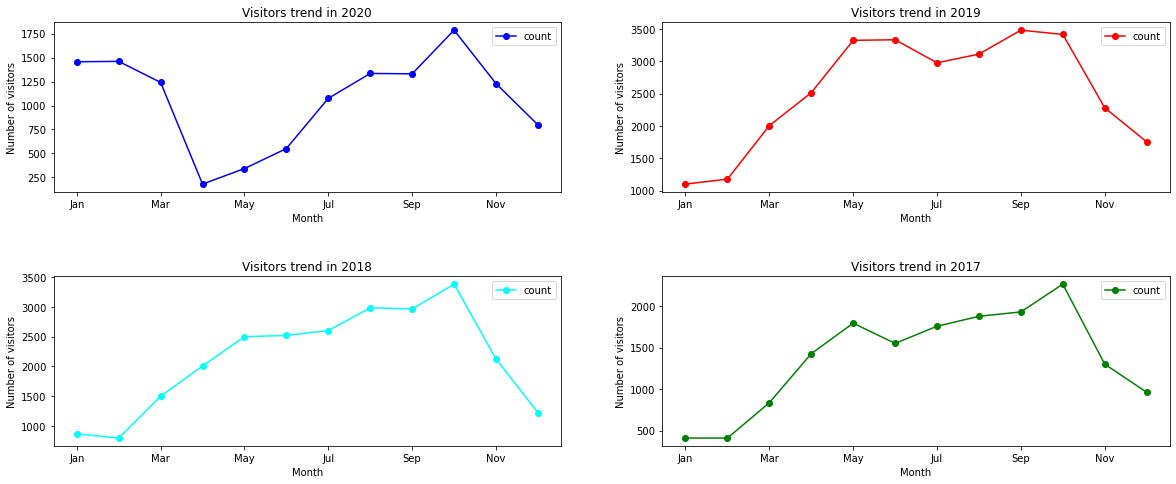

In [14]:

fig = plt.figure(figsize=(20, 6))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

df_2020.plot(kind='line', color='blue', x='month',y='count',marker='o',ax=ax0) # add to subplot 1
ax0.set_title('Visitors trend in 2020')
ax0.set_xlabel('Month')
ax0.set_ylabel('Number of visitors')

df_2019.plot(kind='line', color='red', x='month',y='count',marker='o',ax=ax1) # add to subplot 2
ax1.set_title('Visitors trend in 2019')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of visitors')

df_2018.plot(kind='line', color='cyan', x='month',y='count',marker='o',ax=ax2) # add to subplot 3
ax2.set_title('Visitors trend in 2018')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of visitors')

df_2017.plot(kind='line', color='green', x='month',y='count',marker='o',ax=ax3) # add to subplot 4
ax3.set_title('Visitors trend in 2017')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of visitors')

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5)
plt.show()

we can see october is the most demanded season
and also in most cases 2019-2017 januray,feb and dec is the off season excpet in 2020 april is the off season